# 테스트

In [41]:
from NLP_utils import *
import os
import json
from tqdm import tqdm
import sys
import google.protobuf.text_format as tf
from bareunpy import Tagger

API_KEY="koba-BRBCJ3A-OA4UPJY-QXV5GSI-MU2WLMY"  # 본인 API 키 등록
tagger = Tagger(API_KEY, 'localhost')

txt_list = txt_to_list("split_sentences/modern_literature.txt")

txt_list = txt_list[:100000]
print(len(txt_list))

100000


In [19]:
from collections import defaultdict

word_count = {}

word_tags = ["NNG", "NNP", "VV", "VA", "MAG"]

print("First way")
for txt in tqdm(txt_list):
    pos_list = tagger.pos(txt)

    for pos_text in pos_list:
        if pos_text[1] not in word_tags:
           pass
        else:
            if pos_text in word_count.keys():
                word_count[pos_text] += 1
            else:
                word_count[pos_text] = 1

print(len(word_count.keys()))

# 딕셔너리에 키 존재 유무를 확인할 필요 없음
word_count2 = defaultdict(int)

print("Second way")
for txt in tqdm(txt_list):
    pos_list = tagger.pos(txt)

    for pos_text in pos_list:
        if pos_text[1] not in word_tags:
            continue  # pass 대신 continue를 사용하여 가독성을 향상시킵니다.
        
        word_count2[pos_text] += 1  # defaultdict를 사용하여 초기화를 피합니다.

print(len(word_count2.keys()))

# 딕셔너리에 키 존재 유무를 확인할 필요 없음
word_count3 = defaultdict(int)

print("Third way")
tt = []
for i in range(20):
    tt.append("".join(txt_list[500*i:500*(i+1)]))
for txt in tqdm(tt):
    pos_list = tagger.pos(txt)

    for pos_text in pos_list:
        if pos_text[1] not in word_tags:
            continue  # pass 대신 continue를 사용하여 가독성을 향상시킵니다.
        
        word_count3[pos_text] += 1  # defaultdict를 사용하여 초기화를 피합니다.

print(len(word_count3.keys()))

First way


100%|██████████| 10000/10000 [08:29<00:00, 19.64it/s]


22756
Second way


100%|██████████| 10000/10000 [08:03<00:00, 20.67it/s]


22756
Third way


100%|██████████| 20/20 [02:32<00:00,  7.64s/it]

22867


In [43]:
len_lines = len(txt_list)

num_itters = len_lines//500 + 1 if len_lines%500 != 0 else len_lines//500

print(len_lines)
print(num_itters)

100000
200


In [44]:
# Tagging
tt = []

for i in range(num_itters):
    tt.append("".join(txt_list[500*i:500*(i+1)]))
for txt in tqdm(tt):
    pos_list = tagger.pos(txt)

100%|██████████| 200/200 [18:40<00:00,  5.60s/it]


# 단어 빈도 사전 만들기

In [6]:
from NLP_utils import *
import os
import json
from tqdm import tqdm
import sys
import google.protobuf.text_format as tf
from bareunpy import Tagger

API_KEY="koba-BRBCJ3A-OA4UPJY-QXV5GSI-MU2WLMY"  # 본인 API 키 등록
tagger = Tagger(API_KEY, 'localhost')

In [14]:
# 디렉토리 생성
os.makedirs("word_count", exist_ok=True)

In [7]:
# Tagging + Dictionary
from collections import defaultdict

# NNG - 일반 명사, NNP - 고유 명사, VV - 동사, VA - 형용사, MAG - 일반 부사
word_tags = ["NNG", "NNP", "VV", "VA", "MAG"]

start = 24   # 시작 파일 번호
end = 30    # 끝 파일 번호

for i in range(start, end + 1):
    print(f"------------------------- {i}th / 100th work start -------------------------")

    # i-1번째 JSON 파일 읽어오기
    with open(f"word_count/word_count_{i-1}.json", "r") as in_file:
        word_count_dict = json.load(in_file)
    word_count_dict = defaultdict(int, word_count_dict)     # defaultdict로 생성

    print(f"Word 개수 (Before): {len(word_count_dict)}")

    # i번째 파일 불러오기
    txt_list = txt_to_list(f"split_files/sentence_split_{i}.txt")
    len_lines = len(txt_list)
    num_itters = (len_lines // 500 + 1) if (len_lines % 500 != 0) else (len_lines // 500)

    tt = []

    for j in range(num_itters):
        tt.append("".join(txt_list[500*j:500*(j+1)]))
    for txt in tqdm(tt):
        pos_list = tagger.pos(txt)

        for pos_text in pos_list:
            if pos_text[1] not in word_tags:
                continue  # pass 대신 continue를 사용하여 가독성을 향상
            dict_key = pos_text[0] + "_" + pos_text[1]
            word_count_dict[dict_key] += 1

    print(f"Word 개수 (After): {len(word_count_dict)}")
    # i번째 JSON 파일 읽어오기
    with open(f"word_count/word_count_{i}.json", "w") as out_file:
        json.dump(word_count_dict, out_file)

------------------------- 24th / 100th work start -------------------------
Word 개수 (Before): 1114145


100%|██████████| 912/912 [1:39:36<00:00,  6.55s/it]


Word 개수 (After): 1141277
------------------------- 25th / 100th work start -------------------------
Word 개수 (Before): 1141277


100%|██████████| 912/912 [1:31:54<00:00,  6.05s/it]


Word 개수 (After): 1167567
------------------------- 26th / 100th work start -------------------------
Word 개수 (Before): 1167567


  0%|          | 0/912 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [1]:
import json

# i-1번째 JSON 파일 읽어오기
with open(f"word_count/word_count_22.json", "r") as in_file:
    w_dict = json.load(in_file)

len(set(w_dict))

1086556

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

w_val = list(w_dict.values())
# plt.hist(w_val, bins=100, density=True)
len(w_val)

1086556

In [4]:
# w_val의 평균
mean = np.mean(w_val)
# w_val의 표준편차
std_dev = np.std(w_val)
# w_val의 최솟값
min_value = np.min(w_val)
# w_val의 최댓값
max_value = np.max(w_val)

print(f"평균: {mean:.4f}")
print(f"표준편차: {std_dev:.4f}")
print(f"최솟값: {min_value:.4f}")
print(f"최댓값: {max_value:.4f}")

평균: 74.9417
표준편차: 2970.5796
최솟값: 1.0000
최댓값: 1513672.0000


In [6]:
w_val_log = [np.log(1+x) for x in w_val]

In [7]:
# w_val_log의 평균
mean_log = np.mean(w_val_log)
# w_val_log의 표준편차
std_dev_log = np.std(w_val_log)
# w_val_log의 최솟값
min_value_log = np.min(w_val_log)
# w_val_log의 최댓값
max_value_log = np.max(w_val_log)

print(f"평균: {mean_log:.4f}")
print(f"표준편차: {std_dev_log:.4f}")
print(f"최솟값: {min_value_log:.4f}")
print(f"최댓값: {max_value_log:.4f}")

평균: 1.3692
표준편차: 1.2290
최솟값: 0.6931
최댓값: 14.2300


(array([6.09033e+05, 0.00000e+00, 1.33660e+05, 0.00000e+00, 0.00000e+00,
        6.48720e+04, 4.00350e+04, 0.00000e+00, 2.76740e+04, 2.07690e+04,
        1.61830e+04, 2.41730e+04, 9.24400e+03, 1.44890e+04, 1.11770e+04,
        8.81100e+03, 7.42600e+03, 8.81500e+03, 9.05300e+03, 5.34800e+03,
        7.08500e+03, 5.44000e+03, 4.39100e+03, 4.93500e+03, 3.98700e+03,
        3.97900e+03, 3.41800e+03, 3.12600e+03, 2.94100e+03, 2.75100e+03,
        2.39600e+03, 2.50500e+03, 2.19400e+03, 1.96000e+03, 1.85600e+03,
        1.66800e+03, 1.75600e+03, 1.52600e+03, 1.55000e+03, 1.35300e+03,
        1.31500e+03, 1.23700e+03, 1.14400e+03, 1.05300e+03, 9.64000e+02,
        8.80000e+02, 8.61000e+02, 7.36000e+02, 6.88000e+02, 6.07000e+02,
        5.79000e+02, 4.95000e+02, 3.97000e+02, 4.33000e+02, 3.85000e+02,
        3.39000e+02, 2.86000e+02, 2.90000e+02, 2.61000e+02, 2.19000e+02,
        2.26000e+02, 1.94000e+02, 1.56000e+02, 1.86000e+02, 1.44000e+02,
        1.22000e+02, 9.90000e+01, 9.50000e+01, 8.80

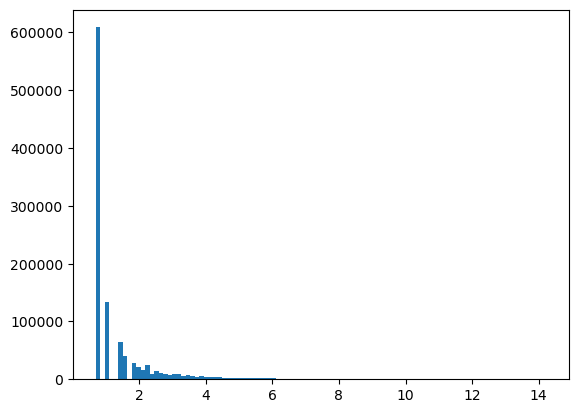

In [9]:
plt.hist(w_val_log, bins=100)

In [25]:
filtered_dict = {key: value for key, value in w_dict.items() if value <= 10}
len(filtered_dict)

945643

In [20]:
filtered_dict

{'선정품_NNG': 1,
 '외산_NNG': 7,
 '당신사랑_NNG': 1,
 '큐비드_NNP': 1,
 '해고골_NNG': 1,
 '다영웅_NNG': 1,
 '타이태닉호_NNG': 1,
 '인마이백_NNG': 1,
 '463_NNP': 1,
 '이윤규_MAG': 1,
 '약불_NNP': 3,
 '임종구_NNG': 5,
 '회장구암출판사_NNG': 2,
 '세계문학예술_NNG': 2,
 '크리쳐물_NNG': 1,
 '발성음절_NNP': 1,
 '일지사물_NNG': 1,
 '산뀡_NNG': 2,
 '머리오리_NNG': 5,
 '가지취_NNG': 5,
 '경구개_NNP': 1,
 '석투전_NNG': 1,
 '희투제_NNG': 2,
 '반생반사_NNG': 8,
 '앞단_NNG': 5,
 '광내_VA': 7,
 '은내_NNG': 4,
 '똘만이_NNG': 7,
 '호라티우스_NNG': 3,
 '예둔_NNG': 3,
 '밴들러_NNP': 3,
 '벨사자르_NNP': 1,
 '네부카드네자르_NNP': 10,
 '깔나_VA': 7,
 '세공물_NNG': 4,
 '바이오헌터_NNP': 3,
 '벨비디어_NNP': 4,
 '나펜_NNG': 1,
 '식별력_NNG': 9,
 '로슈푸코_NNG': 5,
 '하왕_NNP': 2,
 '삼각지전_NNG': 1,
 '만초모란_NNG': 1,
 '부용유_NNG': 1,
 '유손_NNG': 3,
 '사우선_NNG': 1,
 '가스코뉴_NNP': 9,
 '플랑슈_NNG': 2,
 '죽리관_NNP': 1,
 '고례_NNP': 3,
 '하매_MAG': 7,
 '이마누엘_NNP': 8,
 '칸델_NNP': 1,
 '자성대_NNP': 2,
 '오셀로마_NNG': 1,
 '더운밥_MAG': 9,
 '디베이트_MAG': 6,
 '디베이트단_NNG': 1,
 '반품비_NNG': 1,
 '필요관계_NNG': 4,
 '마졸레호수_NNP': 1,
 '바스크나기_NNG': 1,
 '감그_NNG': 2,
 '지에벨스_NNP': 3,
 '발연기_NNG': 8,


* 시간관계 상 25%만 진행함

# 문장 별 품사 태깅

In [3]:
from NLP_utils import *
import os
import json
from tqdm import tqdm
import sys
import google.protobuf.text_format as tf
from bareunpy import Tagger

API_KEY="koba-BRBCJ3A-OA4UPJY-QXV5GSI-MU2WLMY"  # 본인 API 키 등록
tagger = Tagger(API_KEY, 'localhost')

In [23]:
tttt = tagger.tags(txt_list[:1000], auto_split=True)

In [27]:
tttt.pos()

[('“', 'SS'),
 ('안녕', 'NNG'),
 ('하', 'XSA'),
 ('시', 'EP'),
 ('어요', 'EF'),
 (',', 'SP'),
 ('판사', 'NNG'),
 ('님', 'XSN'),
 ('.', 'SF'),
 ('손지은', 'NNP'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF'),
 ('”', 'SS'),
 ('비명', 'NNG'),
 ('소리', 'NNG'),
 ('가', 'JKS'),
 ('뒤', 'NNG'),
 ('에서', 'JKB'),
 ('들리', 'VV'),
 ('어', 'EC'),
 ('깜짝', 'MAG'),
 ('놀라', 'VV'),
 ('ㄴ', 'ETM'),
 ('조경남', 'NNP'),
 ('이', 'JKS'),
 ('뒤', 'NNG'),
 ('를', 'JKO'),
 ('돌아보', 'VV'),
 ('고', 'EC'),
 ('는', 'JX'),
 ('마찬가지', 'NNG'),
 ('로', 'JKB'),
 ('비명', 'NNG'),
 ('을', 'JKO'),
 ('지르', 'VV'),
 ('었', 'EP'),
 ('다', 'EF'),
 ('.', 'SF'),
 ('왜적', 'NNG'),
 ('한', 'MMN'),
 ('놈', 'NNB'),
 ('이', 'JKS'),
 ('박언랑', 'NNG'),
 ('을', 'JKO'),
 ('노리', 'VV'),
 ('고', 'EC'),
 ('칼', 'NNG'),
 ('을', 'JKO'),
 ('휘두르', 'VV'),
 ('며', 'EC'),
 ('달려오', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('었', 'EP'),
 ('다', 'EF'),
 ('.', 'SF'),
 ('자기', 'NP'),
 ('를', 'JKO'),
 ('향하', 'VV'),
 ('아', 'EC'),
 ('달려들', 'VV'),
 ('는', 'ETM'),
 ('왜적', 'NNG'),
 ('도', 'JX'),
 ('두', 'MMN'),
 ('놈', '

In [14]:
# 문장 별 품사 태깅 저장
start = 10   # 시작 파일 번호
end = 25    # 끝 파일 번호

for i in range(start, end + 1):
    print(f"------------------------- {i}th / 25th work start -------------------------")

    txt_list = txt_to_list(f"split_files/sentence_split_{i}.txt")
    text_pos_list = []

    for txt in tqdm(txt_list):
        pos_list = tagger.pos(txt)
        text_pos_list.append(pos_list)
    
    with open(f"split_morphemes/sentence_split_{i}.txt", "w") as out_file:
        for tp in text_pos_list:
            out_file.write(tp + "\n")

------------------------- 10th / 25th work start -------------------------


  0%|          | 1257/455796 [00:51<5:07:23, 24.64it/s]


KeyboardInterrupt: 